In [45]:
import pandas as pd
import seaborn as sns
import os

In [46]:
HC_path = '/Users/jk1/temp/stroke_resilience/output/stroke_resilience/HC/small_worldness_comparison.csv'
ST01_path = '/Users/jk1/temp/stroke_resilience/output/stroke_resilience/ST01/small_worldness_comparison.csv'
ST02_path = '/Users/jk1/temp/stroke_resilience/output/stroke_resilience/ST02/small_worldness_comparison.csv'
ST03_path = '/Users/jk1/temp/stroke_resilience/output/stroke_resilience/ST03/small_worldness_comparison.csv'

output_save_path = '/Users/jk1/temp/stroke_resilience/output/figures'

In [47]:
HC_metrics = pd.read_csv(HC_path)
HC_metrics['timepoint_group'] = 'HC'

ST01_metrics = pd.read_csv(ST01_path)
ST01_metrics['timepoint_group'] = 'ST01'

ST02_metrics = pd.read_csv(ST02_path)
ST02_metrics['timepoint_group'] = 'ST02'

ST03_metrics = pd.read_csv(ST03_path)
ST03_metrics['timepoint_group'] = 'ST03'

all_groups_metrics = pd.concat([HC_metrics, ST01_metrics, ST02_metrics, ST03_metrics], ignore_index=True)

In [48]:
# Drop threshold < 0.3
all_groups_metrics = all_groups_metrics[all_groups_metrics.threshold != 'top0']
all_groups_metrics = all_groups_metrics[all_groups_metrics.threshold != 'top10']
all_groups_metrics = all_groups_metrics[all_groups_metrics.threshold != 'top20']


In [49]:
all_groups_metrics = all_groups_metrics.drop('subject', axis=1)

In [50]:
filter_col_random_graph_clustering = [col for col in all_groups_metrics if col.startswith('random_graph_clustering_coefficient_')]
all_groups_metrics['mean_random_graph_clustering_coefficient'] = all_groups_metrics[filter_col_random_graph_clustering].mean(axis=1)

filter_col_random_graph_path_length = [col for col in all_groups_metrics if col.startswith('random_graph_path_length_')]
all_groups_metrics['mean_random_graph_path_length'] = all_groups_metrics[filter_col_random_graph_path_length].mean(axis=1)

all_groups_metrics = all_groups_metrics.drop(filter_col_random_graph_clustering, axis=1)
all_groups_metrics = all_groups_metrics.drop(filter_col_random_graph_path_length, axis=1)

In [51]:
all_groups_metrics['non_normalized_smw'] = all_groups_metrics['mean_clustering_coefficient'].div(all_groups_metrics['mean_path_length'])

In [52]:
mean_metrics = all_groups_metrics.groupby(
    ['timepoint_group', 'threshold', 'graph_method', 'clustering_coefficient_type']
).mean()
mean_metrics

In [53]:
# transform back into normal df
mean_metrics = mean_metrics.reset_index()

In [54]:
# sort thresholds
mean_metrics['sort'] = mean_metrics['threshold'].str.extract('(\d+)', expand=False).astype(int)
mean_metrics = mean_metrics.sort_values('sort', ascending=True)
# sort groups
mean_metrics = mean_metrics.sort_values(['timepoint_group', 'sort'], ascending=True)
mean_metrics = mean_metrics.drop('sort', axis=1)

In [55]:
mean_metrics.to_csv(os.path.join(output_save_path, 'mean_small_worldness_metrics.csv'))

In [60]:
def create_and_save_plot(dependant_variable:str):
    g = sns.relplot(data=mean_metrics, x='timepoint_group', y=dependant_variable, hue='threshold', style='threshold',
                col="graph_method", row="clustering_coefficient_type",
                alpha=.7, kind="line", palette='flare')

    for i, axes_row in enumerate(g.axes):
        for j, axes_col in enumerate(axes_row):
            row, col = axes_col.get_title().split('|')
            # axes_col.set_title(f'{col.strip()}\n{row.strip()}')
            if i == 0:
                axes_col.set_title(col.strip())
            else:
                axes_col.set_title('')

            if j == 0:
                ylabel = axes_col.get_ylabel()
                axes_col.set_ylabel(row.strip() + '\n' + ylabel)
    g.fig.suptitle(dependant_variable, y=1.03)
    g.savefig(os.path.join(output_save_path, dependant_variable + ".png"))

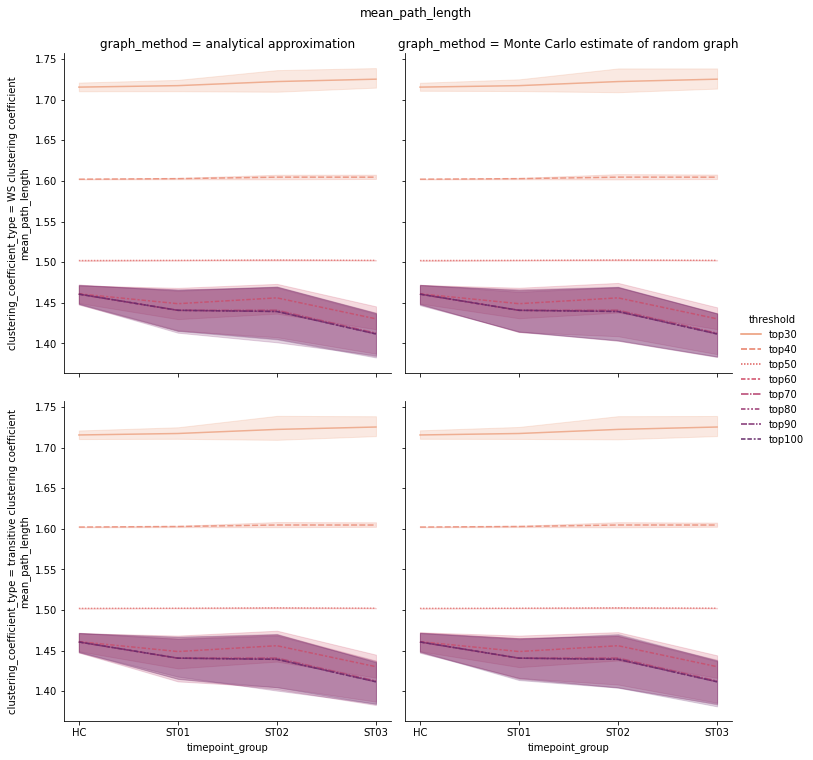

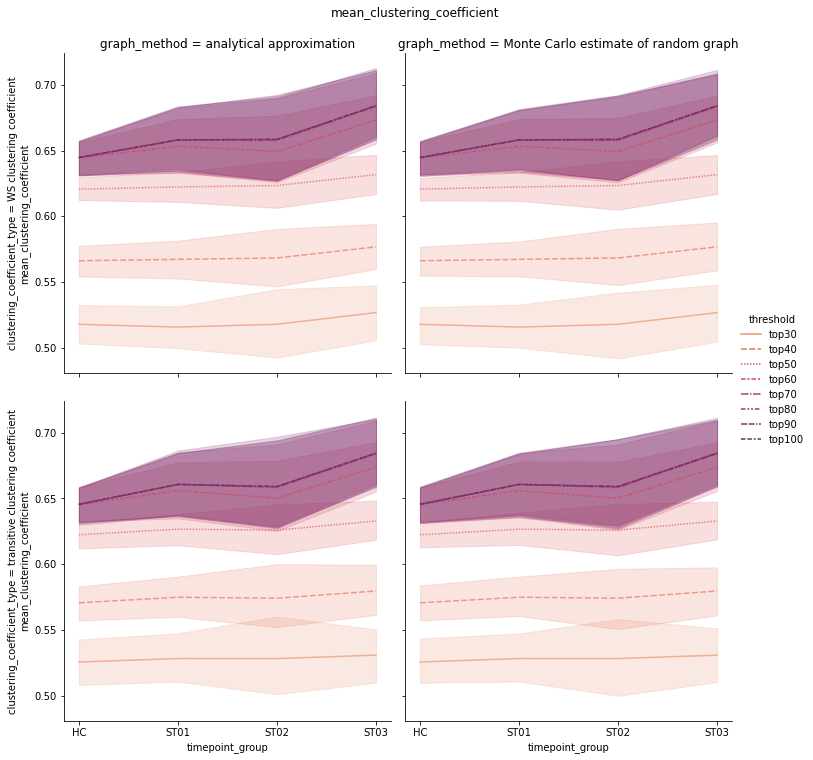

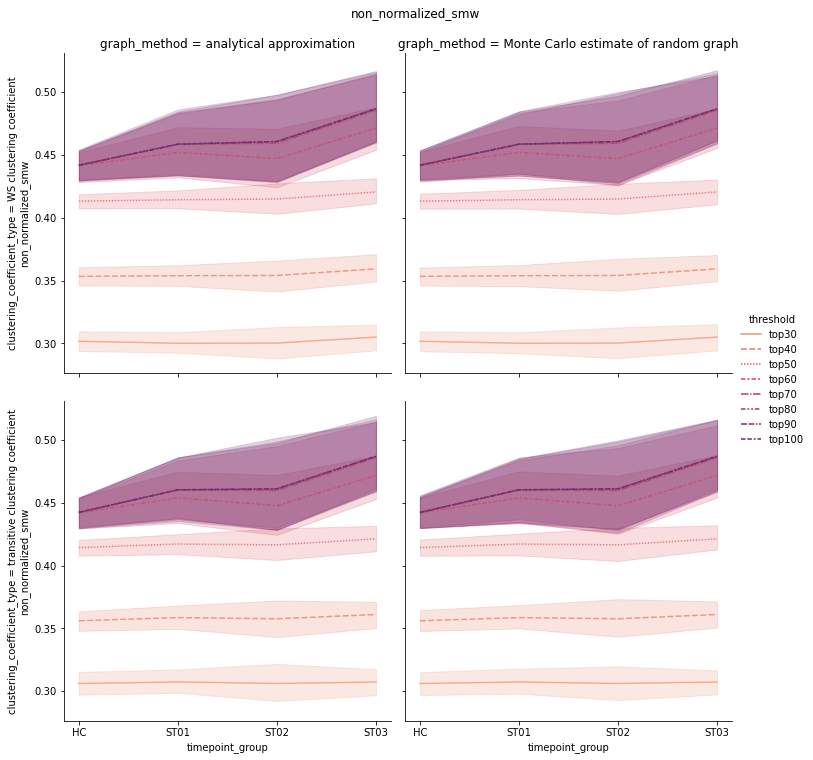

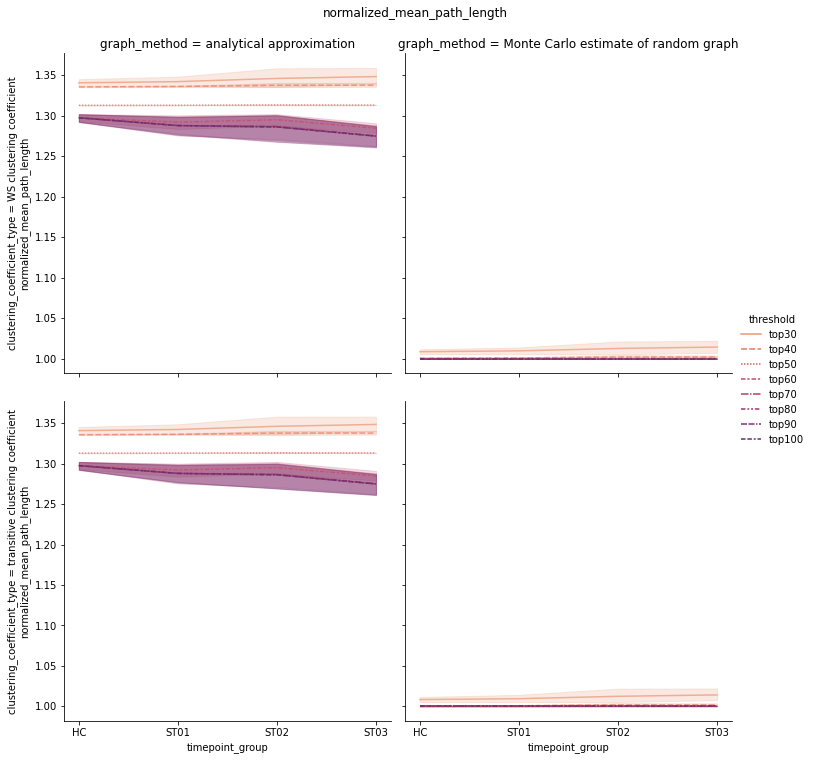

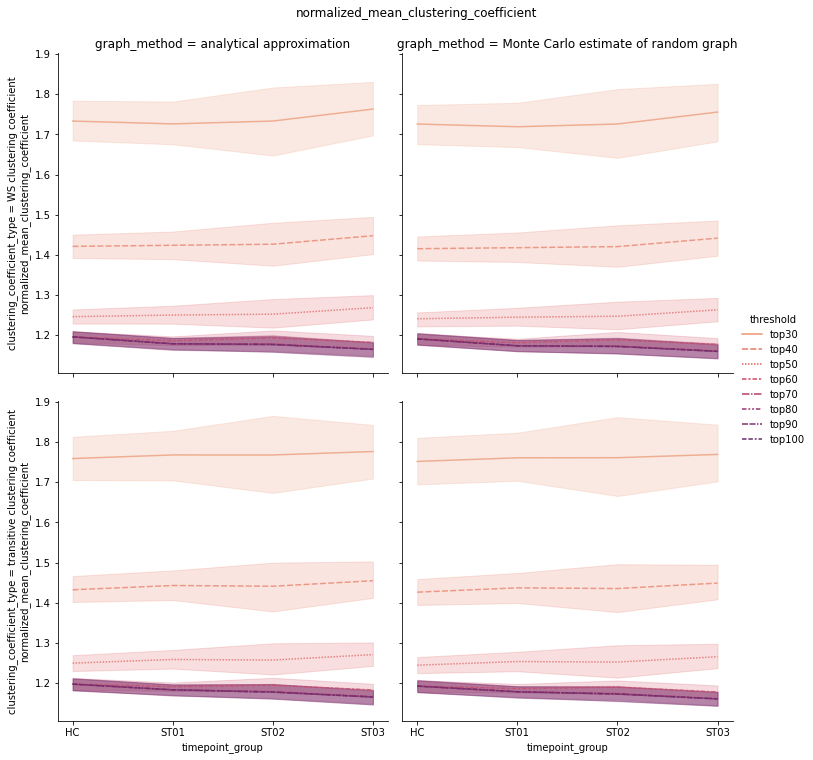

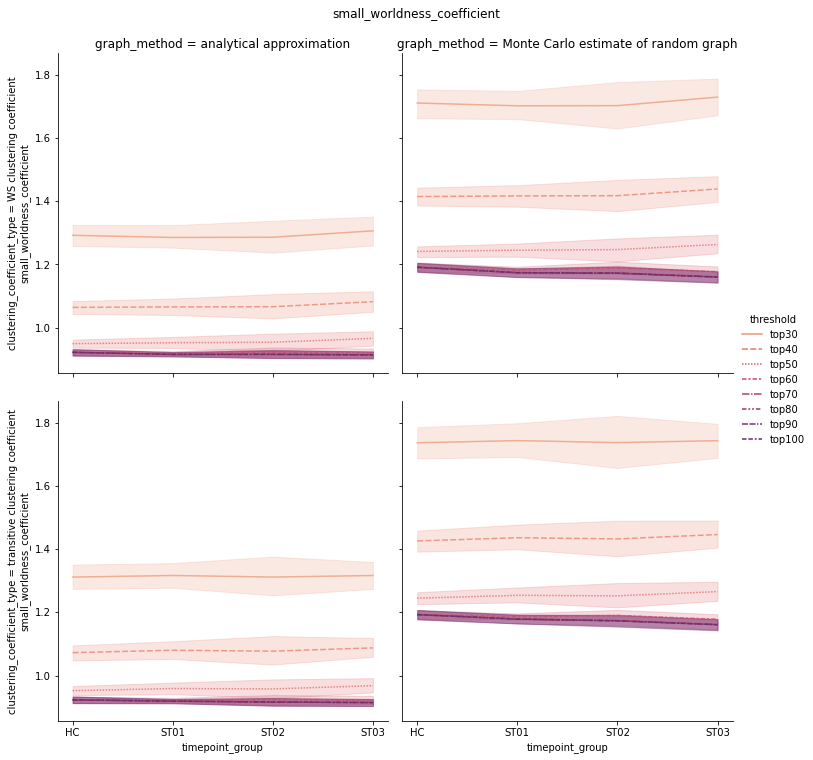

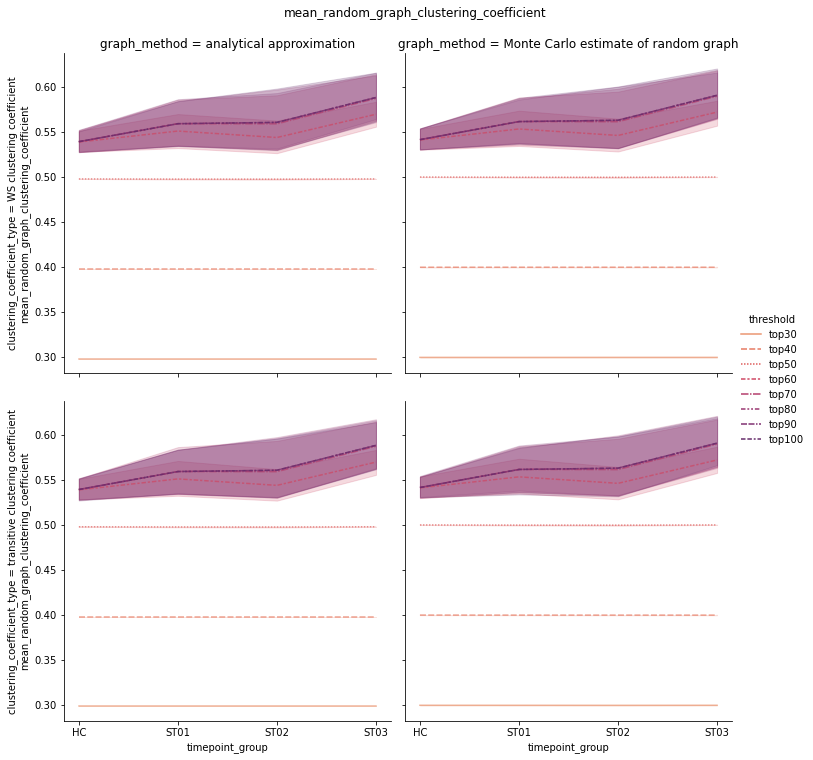

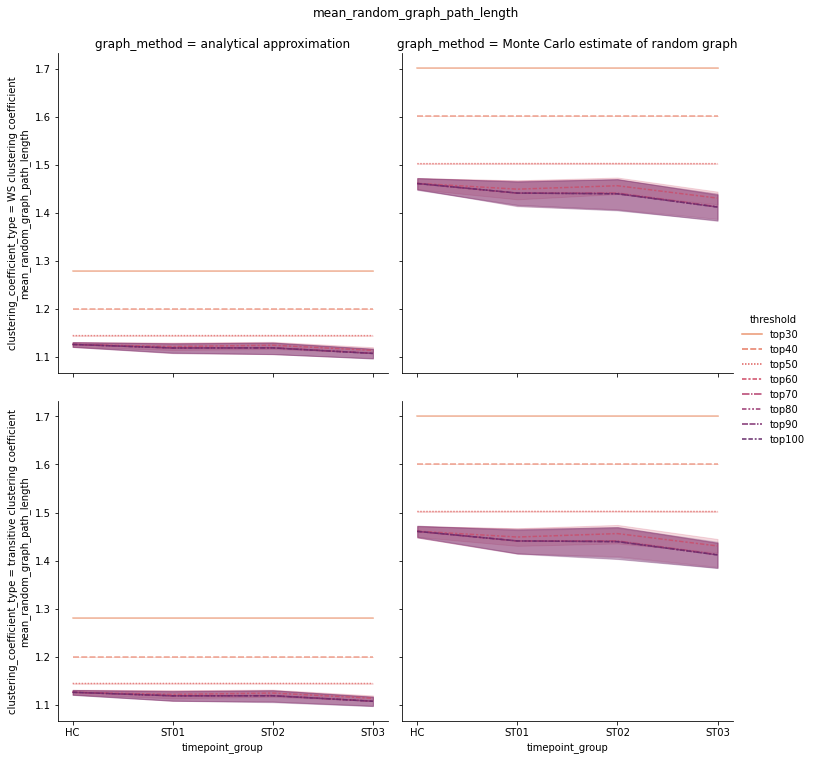

In [61]:
create_and_save_plot('mean_path_length')
create_and_save_plot('mean_clustering_coefficient')
create_and_save_plot('non_normalized_smw')
create_and_save_plot('normalized_mean_path_length')
create_and_save_plot('normalized_mean_clustering_coefficient')
create_and_save_plot('small_worldness_coefficient')
create_and_save_plot('mean_random_graph_clustering_coefficient')
create_and_save_plot('mean_random_graph_path_length')